In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import sklearn.metrics as metrics


In [ ]:
root_path ='gdrive/My Drive/Stocks Internship'

In [ ]:
data = "gdrive/My Drive/Stocks Internship/TSLA.csv"
file1 = open(data, "r")
data= pd.read_csv(file1)
print (data)

            Date     Close     Volume      Open      High       Low
0     08/23/2023  236.8600  101077600  229.3400  238.9800  229.2900
1     08/22/2023  233.1900  130597900  240.2500  240.8200  229.5500
2     08/21/2023  231.2800  135702700  221.5512  232.1343  220.5800
3     08/18/2023  215.4900  136276600  214.1200  217.5800  212.3600
4     08/17/2023  219.2200  120718400  226.0600  226.7400  218.8300
...          ...       ...        ...       ...       ...       ...
1251  08/31/2018   20.1107   80505680   20.1333   20.3539   19.9067
1252  08/30/2018   20.2100  108159321   20.1507   20.3067   19.8480
1253  08/29/2018   20.3340  111158014   20.6847   20.7900   20.2460
1254  08/28/2018   20.7907  114591738   21.2273   21.2587   20.7460
1255  08/27/2018   21.2847  195939652   21.2000   21.4957   20.5873

[1256 rows x 6 columns]


In [ ]:
data['Open-Close'] = data['Open'] - data['Close'].shift(1)
data['Open-Open'] = data['Open'] - data['Open'].shift(1)

data['Moving Avg']=data['Close'].rolling(5).mean()  #adding a moving average
data['Daily Ret']=(data['Close']-data['Open'])/data['Open']*100

print('\nBefore normalizing data:\n',data)
data=data.dropna()
data=data[::-1]
data


print (data.head(15))
X = data[['Open','Close','Open-Close','Daily Ret', 'Moving Avg']]
#print (X)
data['Next_Day'] = np.where(data['Close'].shift(-1) < data['Close'], 1, 0)
y = data['Next_Day'].values
print (data.head(15))



Before normalizing data:
             Date     Close     Volume      Open      High       Low  \
0     08/23/2023  236.8600  101077600  229.3400  238.9800  229.2900   
1     08/22/2023  233.1900  130597900  240.2500  240.8200  229.5500   
2     08/21/2023  231.2800  135702700  221.5512  232.1343  220.5800   
3     08/18/2023  215.4900  136276600  214.1200  217.5800  212.3600   
4     08/17/2023  219.2200  120718400  226.0600  226.7400  218.8300   
...          ...       ...        ...       ...       ...       ...   
1251  08/31/2018   20.1107   80505680   20.1333   20.3539   19.9067   
1252  08/30/2018   20.2100  108159321   20.1507   20.3067   19.8480   
1253  08/29/2018   20.3340  111158014   20.6847   20.7900   20.2460   
1254  08/28/2018   20.7907  114591738   21.2273   21.2587   20.7460   
1255  08/27/2018   21.2847  195939652   21.2000   21.4957   20.5873   

      Open-Close  Open-Open  Moving Avg  Daily Ret  
0            NaN        NaN         NaN   3.278974  
1         3.39

<ipython-input-16-f47377b938e8>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


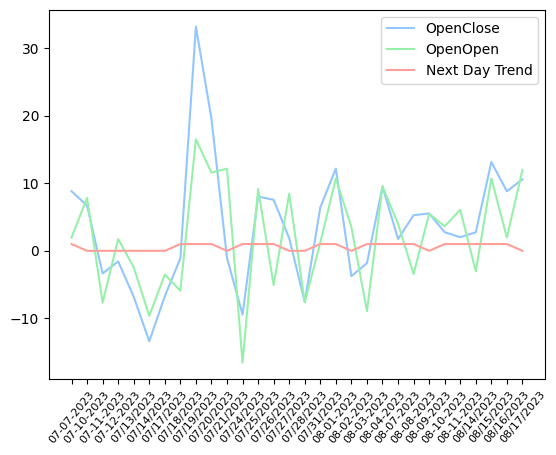

In [ ]:
plt.style.use('seaborn-pastel')
plt.plot(data['Date'].tail(30),data[['Open-Close']].tail(30),label='OpenClose')
plt.plot(data['Date'].tail(30),data[['Open-Open']].tail(30),label='OpenOpen')

plt.plot(data['Date'].tail(30),data[['Next_Day']].tail(30),label='Next Day Trend')

plt.xticks(rotation=50, fontsize=8)
plt.legend()
plt.show()

<ipython-input-8-20bdd0c5154f>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


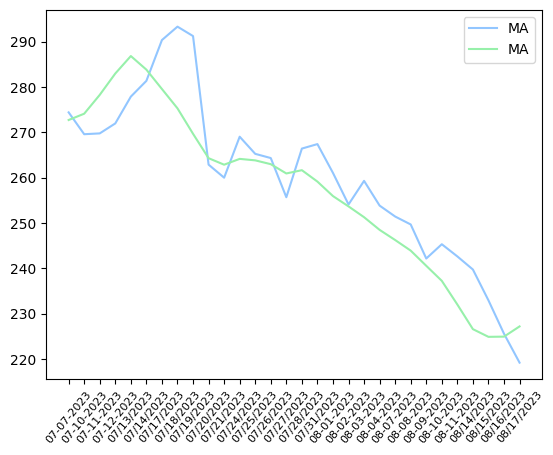

In [ ]:
plt.style.use('seaborn-pastel')
plt.plot(data['Date'].tail(30),data[['Close','Moving Avg']].tail(30),label='MA')
plt.xticks(rotation=50, fontsize=8)
plt.legend()
plt.show()

In [ ]:
split = int(0.8*len(data))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print (len(X_train))
print (len(X_test))

1001
251


In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)


In [ ]:
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy*100)
print("Predicted Values:", predictions)
print("Actual Values:", y_test)
pred=pd.DataFrame(columns=predictions).transpose()
pred['Actual']=y_test
print (pred.head(10))
pred.to_csv('gdrive/My Drive/Stocks Internship/TSLApred_result.csv',mode='w')

Accuracy: 88.84462151394422
Predicted Values: [1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1
 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1]
Actual Values: [1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1
 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1

In [ ]:
print(metrics.confusion_matrix(y_test, predictions))


[[122   7]
 [ 21 101]]


In [ ]:
print(metrics.classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.85      0.95      0.90       129
           1       0.94      0.83      0.88       122

    accuracy                           0.89       251
   macro avg       0.89      0.89      0.89       251
weighted avg       0.89      0.89      0.89       251



In [ ]:
res=metrics.classification_report(y_test, predictions, output_dict=True)
result=pd.DataFrame(res).transpose()
print (result)

result.to_csv('gdrive/My Drive/Stocks Internship/TSLApred_result.csv',mode='a')


              precision    recall  f1-score     support
0              0.853147  0.945736  0.897059  129.000000
1              0.935185  0.827869  0.878261  122.000000
accuracy       0.888446  0.888446  0.888446    0.888446
macro avg      0.894166  0.886803  0.887660  251.000000
weighted avg   0.893022  0.888446  0.887922  251.000000
